# HR Employee Attrition Analysis

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

## Exploratory Data Analysis

In [5]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (1470, 35)


In [6]:
print('The columns of the dataset are ',df.columns)

The columns of the dataset are  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [7]:
print('The number of duplicated rows in the dataset are',df.duplicated().sum())

The number of duplicated rows in the dataset are 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
print('The number of null values in the dataset are ',df.isnull().sum())

The number of null values in the dataset are  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany          

In [10]:
df.nunique().to_frame('Unique Values')

Unique Values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EmployeeCount                         1
EmployeeNumber                     1470
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
Over18                                1
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StandardHours                         1
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

In [11]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.

* EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
* EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition
* Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
* StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

In [12]:
cat_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        cat_cols.append(x)
print('The Object data type columns are ',cat_cols)

num_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        num_cols.append(x)
print('The Numerical data type columns are ',num_cols)

The Object data type columns are  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
The Numerical data type columns are  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Exploring Unique Values in each Catagorical Columns

In [13]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

In [14]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

In [15]:
df.describe(include='all').T

count unique                     top  freq  \
Age                       1470.0    NaN                     NaN   NaN   
Attrition                   1470      2                      No  1233   
BusinessTravel              1470      3           Travel_Rarely  1043   
DailyRate                 1470.0    NaN                     NaN   NaN   
Department                  1470      3  Research & Development   961   
DistanceFromHome          1470.0    NaN                     NaN   NaN   
Education                 1470.0    NaN                     NaN   NaN   
EducationField              1470      6           Life Sciences   606   
EnvironmentSatisfaction   1470.0    NaN                     NaN   NaN   
Gender                      1470      2                    Male   882   
HourlyRate                1470.0    NaN                     NaN   NaN   
JobInvolvement            1470.0    NaN                     NaN   NaN   
JobLevel                  1470.0    NaN                     NaN   NaN   
JobRole                     1470      9         Sales Executive   326   
JobSatisfaction           1470.0    NaN                     NaN   NaN   
MaritalStatus               1470      3                 Married   673   
MonthlyIncome             1470.0    NaN                     NaN   NaN   
MonthlyRate               1470.0    NaN                     NaN   NaN   
NumCompaniesWorked        1470.0    NaN                     NaN   NaN   
OverTime                    1470      2                      No  1054   
PercentSalaryHike         1470.0    NaN                     NaN   NaN   
PerformanceRating         1470.0    NaN                     NaN   NaN   
RelationshipSatisfaction  1470.0    NaN                     NaN   NaN   
StockOptionLevel          1470.0    NaN                     NaN   NaN   
TotalWorkingYears         1470.0    NaN                     NaN   NaN   
TrainingTimesLastYear     1470.0    NaN                     NaN   NaN   
WorkLifeBalance           1470.0    NaN                     NaN   NaN   
YearsAtCompany            1470.0    NaN                     NaN   NaN   
YearsInCurrentRole        1470.0    NaN                     NaN   NaN   
YearsSinceLastPromotion   1470.0    NaN                     NaN   NaN   
YearsWithCurrManager      1470.0    NaN                     NaN   NaN   

                                  mean          std     min     25%      50%  \
Age                           36.92381     9.135373    18.0    30.0     36.0   
Attrition                          NaN          NaN     NaN     NaN      NaN   
BusinessTravel                     NaN          NaN     NaN     NaN      NaN   
DailyRate                   802.485714     403.5091   102.0   465.0    802.0   
Department                         NaN          NaN     NaN     NaN      NaN   
DistanceFromHome              9.192517     8.106864     1.0     2.0      7.0   
Education                     2.912925     1.024165     1.0     2.0      3.0   
EducationField                     NaN          NaN     NaN     NaN      NaN   
EnvironmentSatisfaction       2.721769     1.093082     1.0     2.0      3.0   
Gender                             NaN          NaN     NaN     NaN      NaN   
HourlyRate                   65.891156    20.329428    30.0    48.0     66.0   
JobInvolvement                2.729932     0.711561     1.0     2.0      3.0   
JobLevel                      2.063946      1.10694     1.0     1.0      2.0   
JobRole                            NaN          NaN     NaN     NaN      NaN   
JobSatisfaction               2.728571     1.102846     1.0     2.0      3.0   
MaritalStatus                      NaN          NaN     NaN     NaN      NaN   
MonthlyIncome              6502.931293  4707.956783  1009.0  2911.0   4919.0   
MonthlyRate               14313.103401  7117.786044  2094.0  8047.0  14235.5   
NumCompaniesWorked            2.693197     2.498009     0.0     1.0      2.0   
OverTime                           NaN          NaN     NaN     NaN      NaN   
PercentSal

## Data Visualization

No     1233
Yes     237
Name: Attrition, dtype: int64


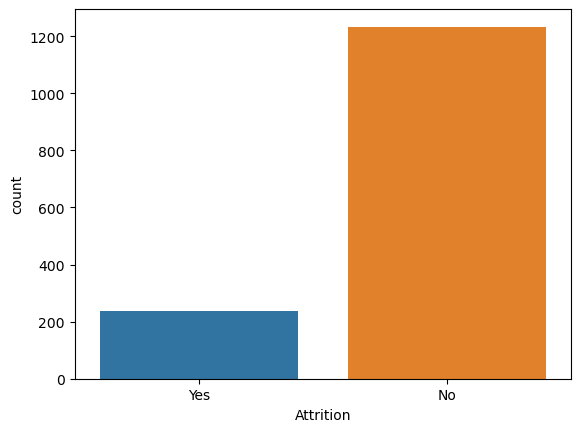

In [16]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df)
plt.show()

## Attrition Rate By Gender

Male      882
Female    588
Name: Gender, dtype: int64


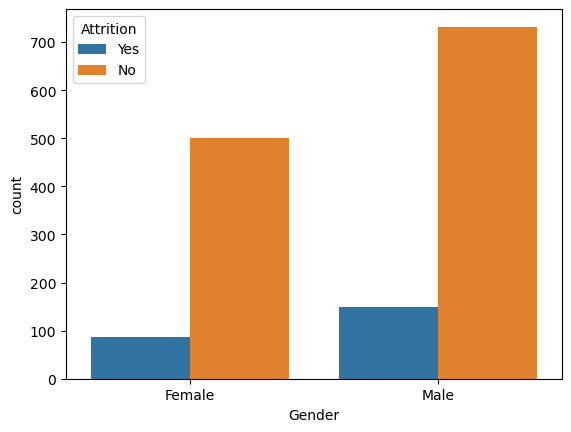

In [17]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.show()

## Attrition By Business Travel

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


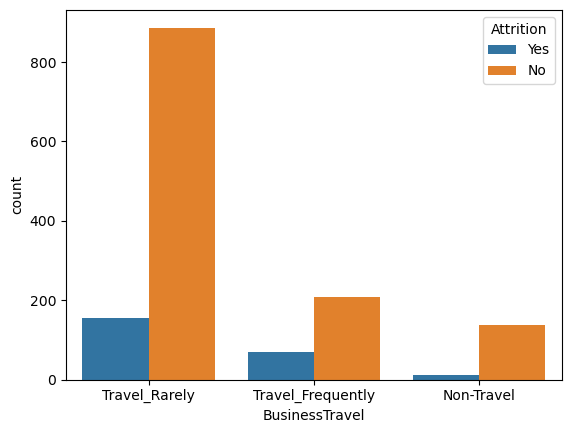

In [18]:
print(df['BusinessTravel'].value_counts())
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.show()

## Attrition By Department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


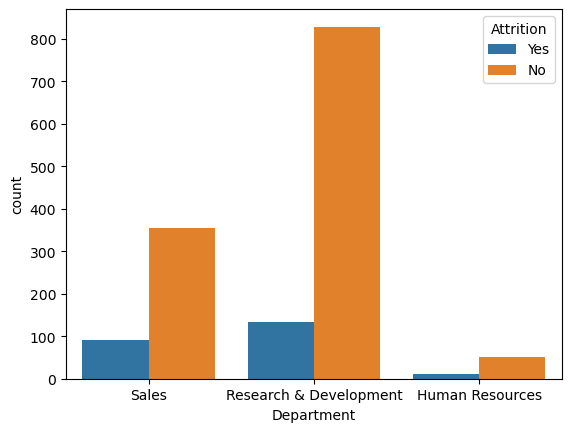

In [19]:
print(df['Department'].value_counts())
sns.countplot(x='Department',hue='Attrition',data=df)
plt.show()

## Attrition By Education Field

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


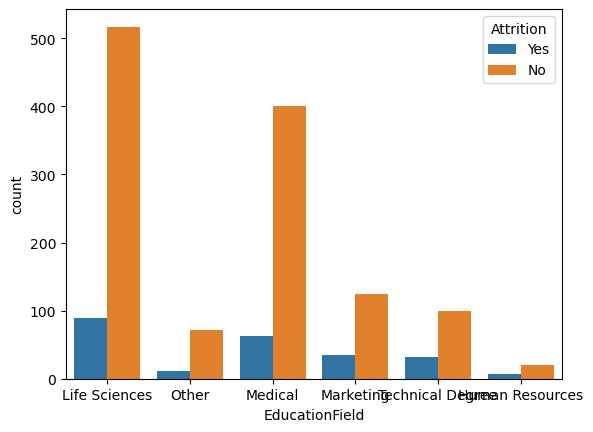

In [20]:
print(df['EducationField'].value_counts())
sns.countplot(x='EducationField',hue='Attrition',data=df)
plt.show()

## Attrition By Job Role

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


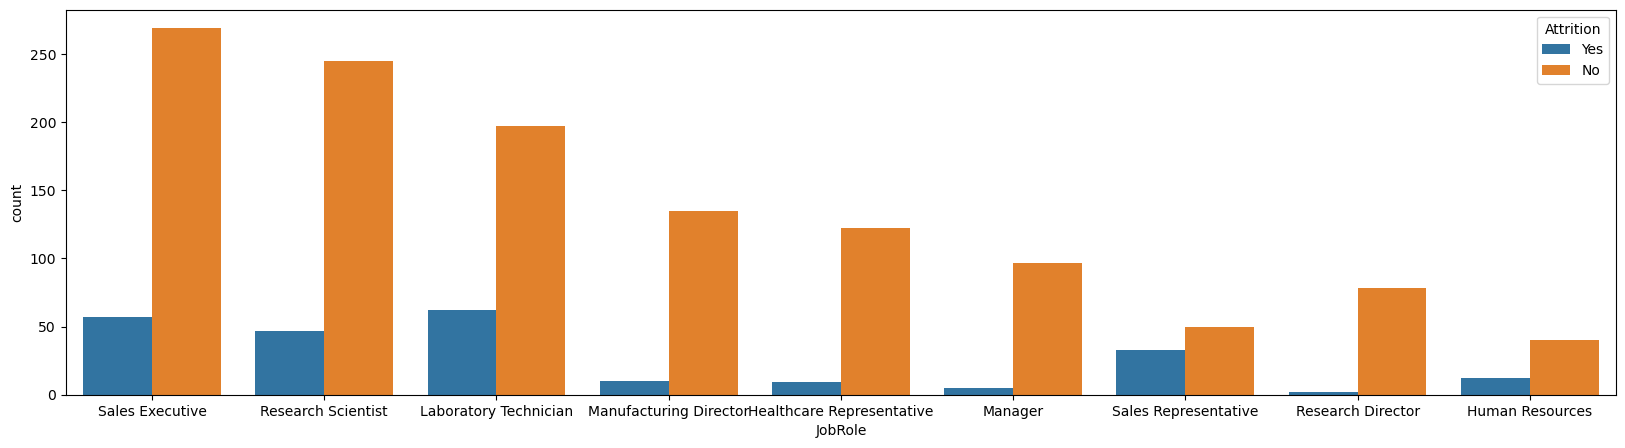

In [21]:
print(df['JobRole'].value_counts())
plt.figure(figsize=(20,5))
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.show()

## Attrition By Marital Status

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


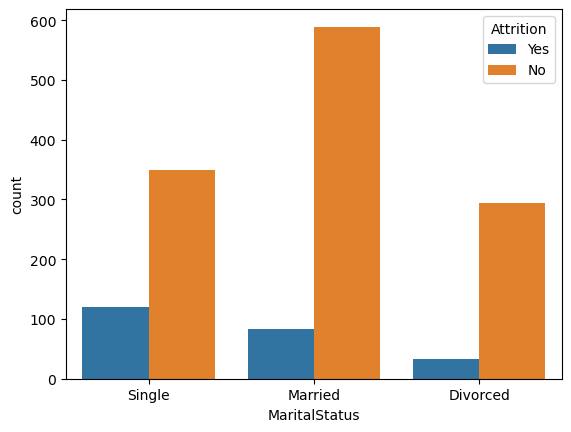

In [22]:
print(df['MaritalStatus'].value_counts())
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.show()

## Attrition By Over Time

No     1054
Yes     416
Name: OverTime, dtype: int64


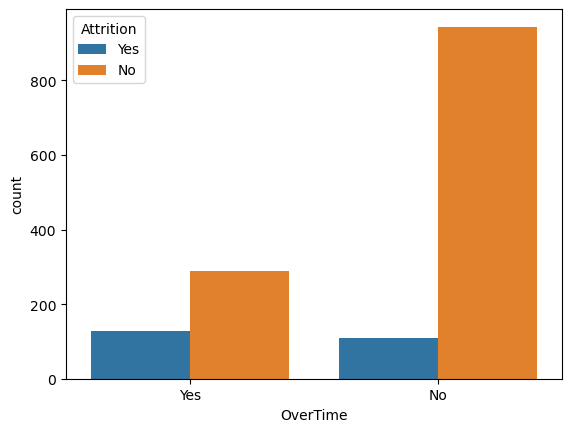

In [23]:
print(df['OverTime'].value_counts())
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.show()

## Attrition By Work Life Balance

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


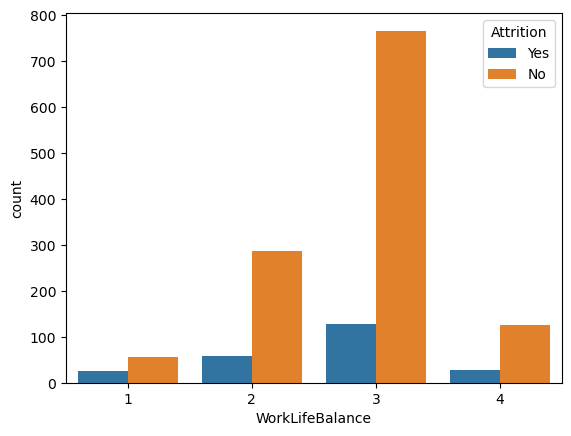

In [24]:
print(df['WorkLifeBalance'].value_counts())
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)
plt.show()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


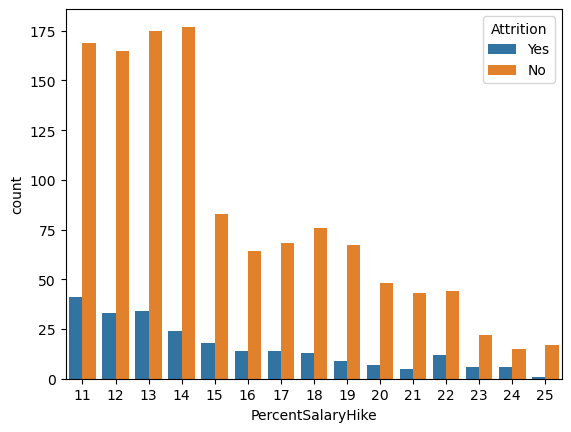

In [25]:
print(df['PercentSalaryHike'].value_counts())
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df)
plt.show()

## Attrition By Performance Rating

3    1244
4     226
Name: PerformanceRating, dtype: int64


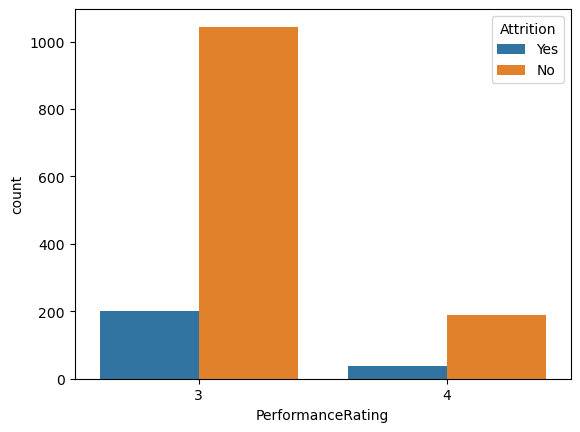

In [26]:
print(df['PerformanceRating'].value_counts())
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)
plt.show()

## Attrition By Environment Satisfaction

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


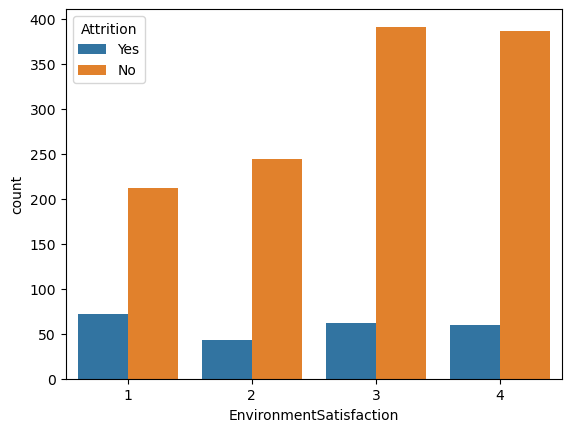

In [27]:
print(df['EnvironmentSatisfaction'].value_counts())
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)
plt.show()

## Attrition By Job Satisfaction

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


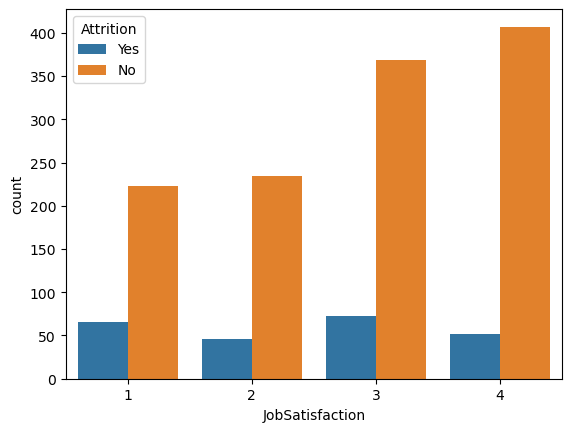

In [28]:
print(df['JobSatisfaction'].value_counts())
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.show()

In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Bi-Variate Analysis

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

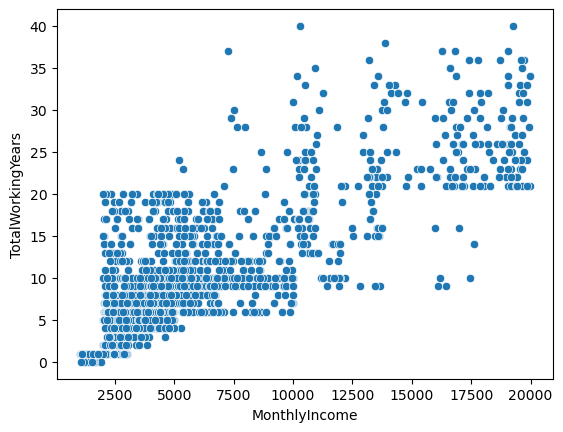

In [30]:
sns.scatterplot(x='MonthlyIncome',y='TotalWorkingYears',data=df)

<AxesSubplot:xlabel='Age', ylabel='TotalWorkingYears'>

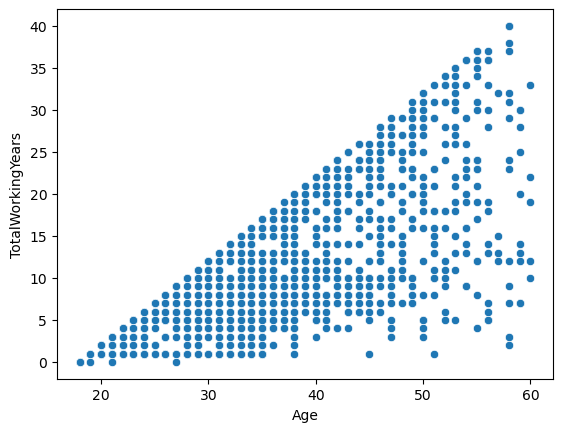

In [31]:
sns.scatterplot(x='Age',y='TotalWorkingYears',data=df)

## Multivariate Analysis

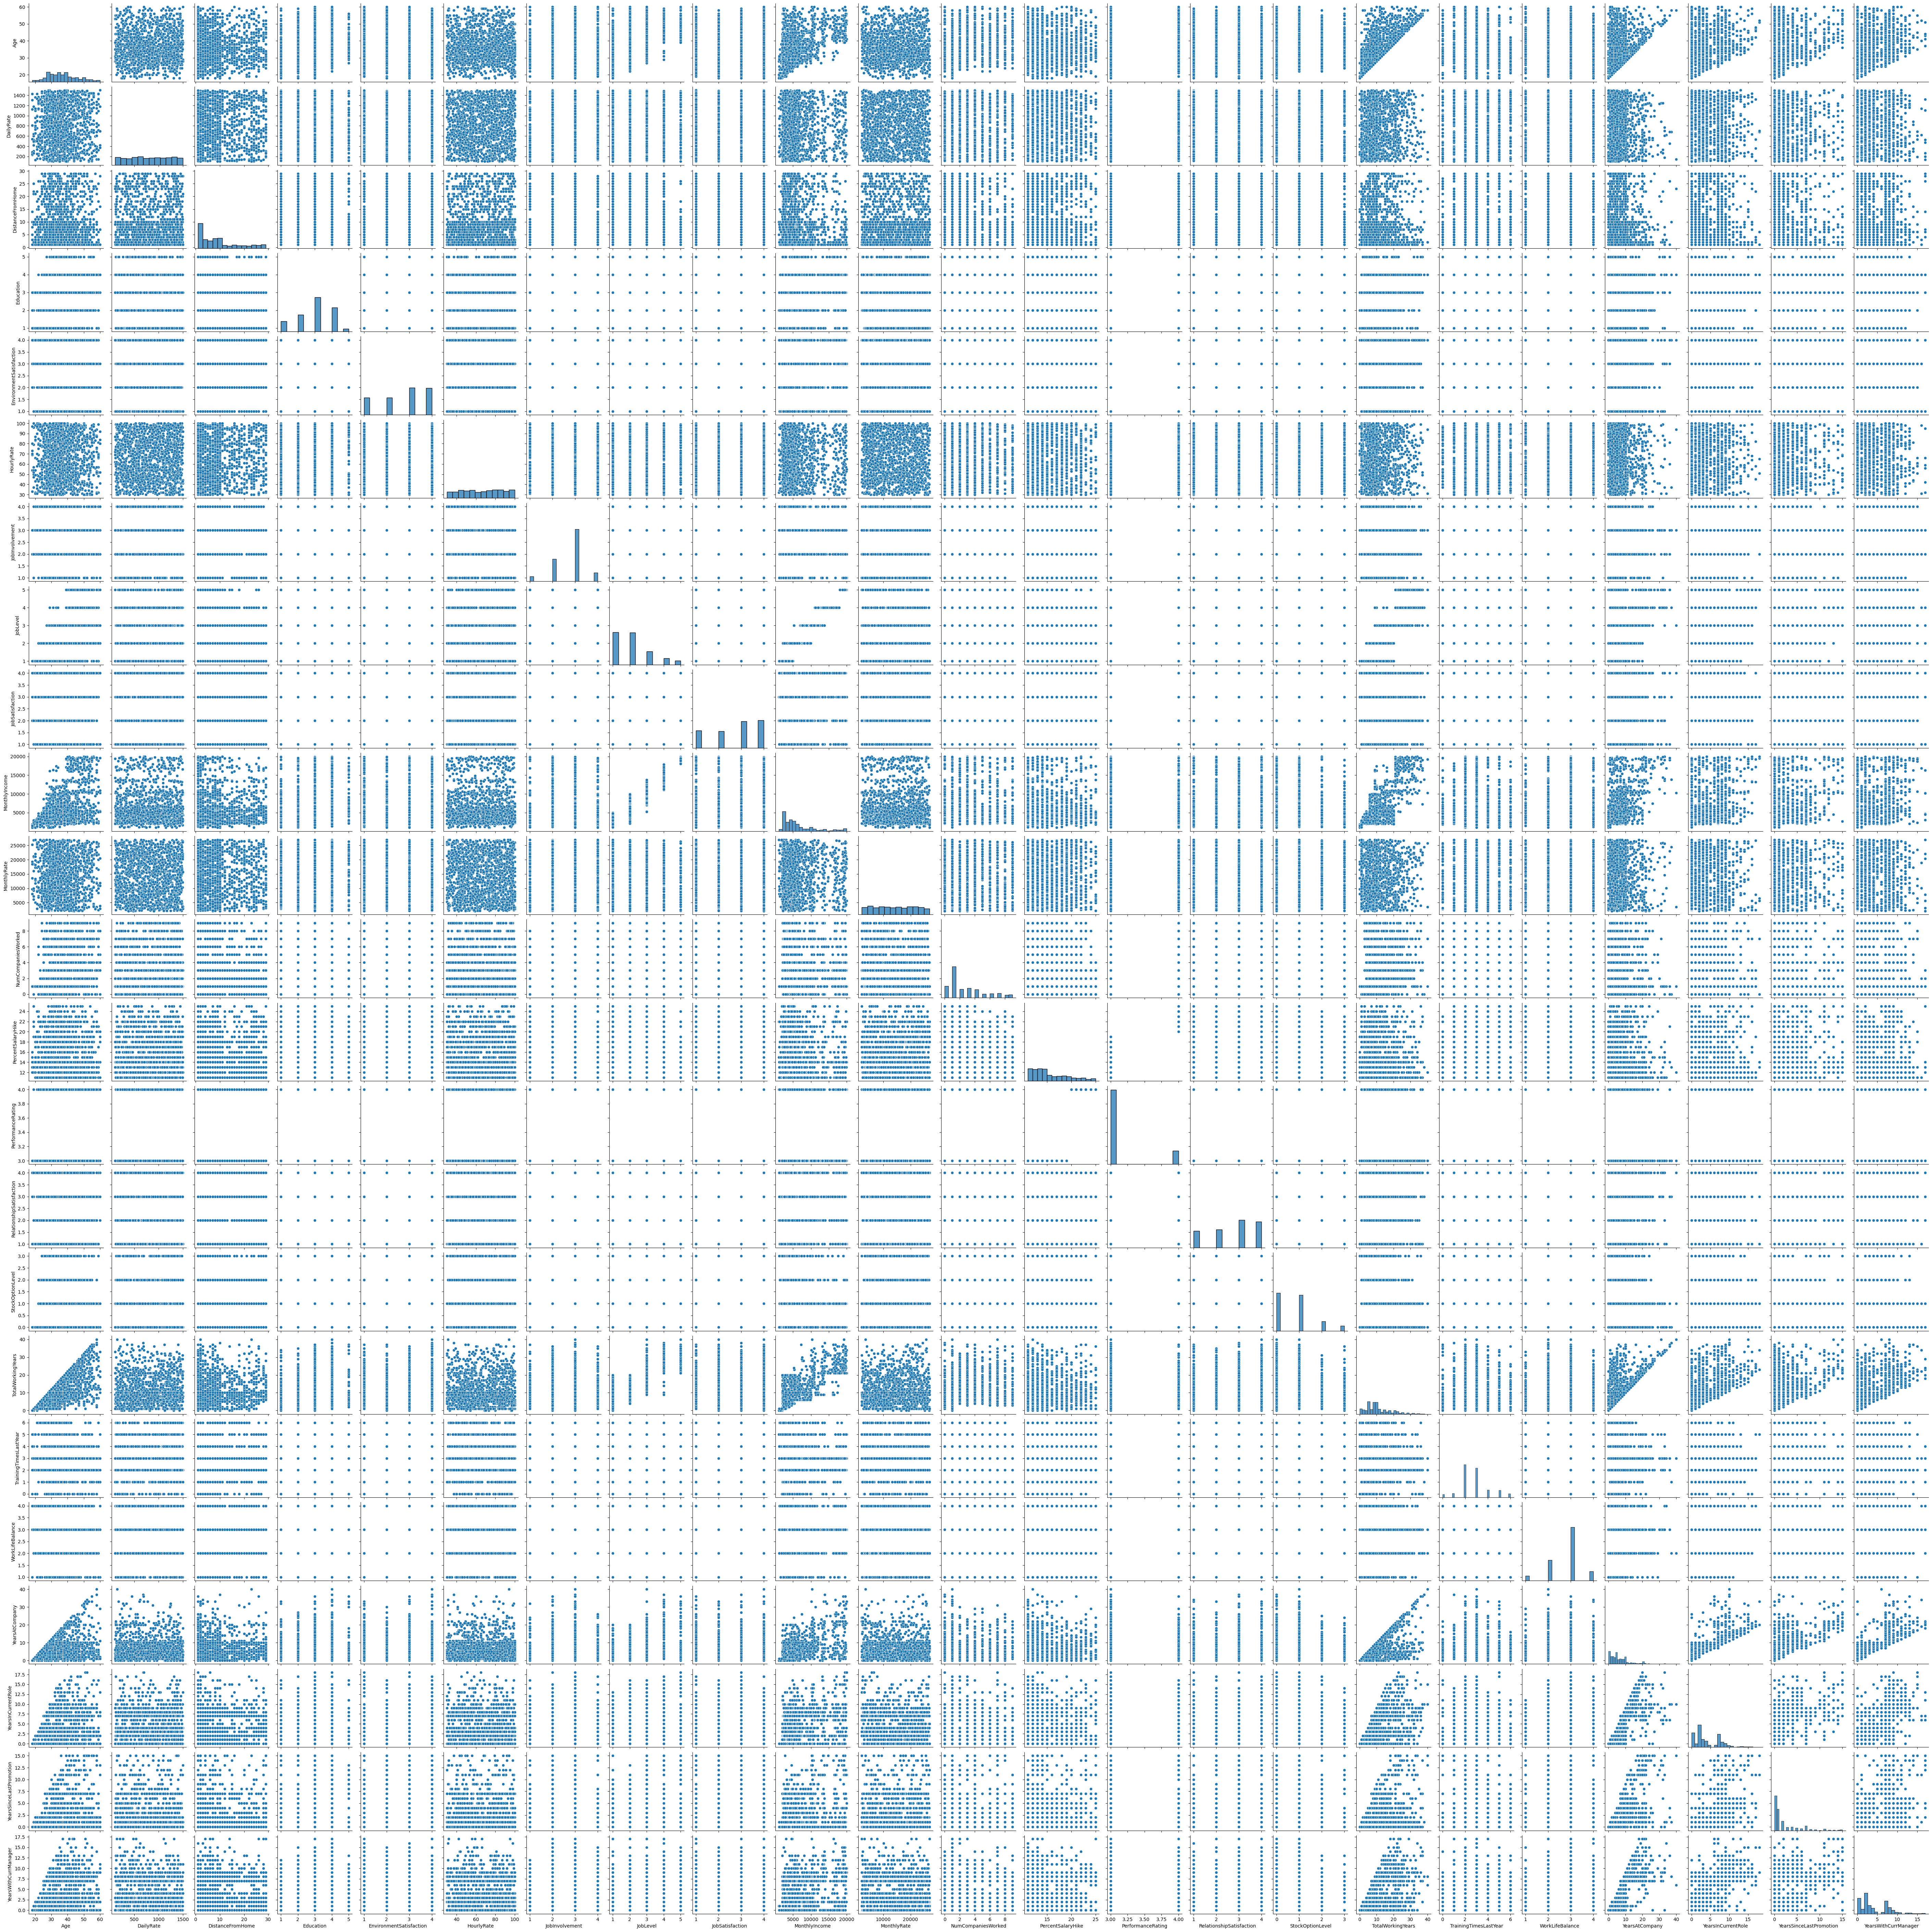

In [32]:
sns.pairplot(df)

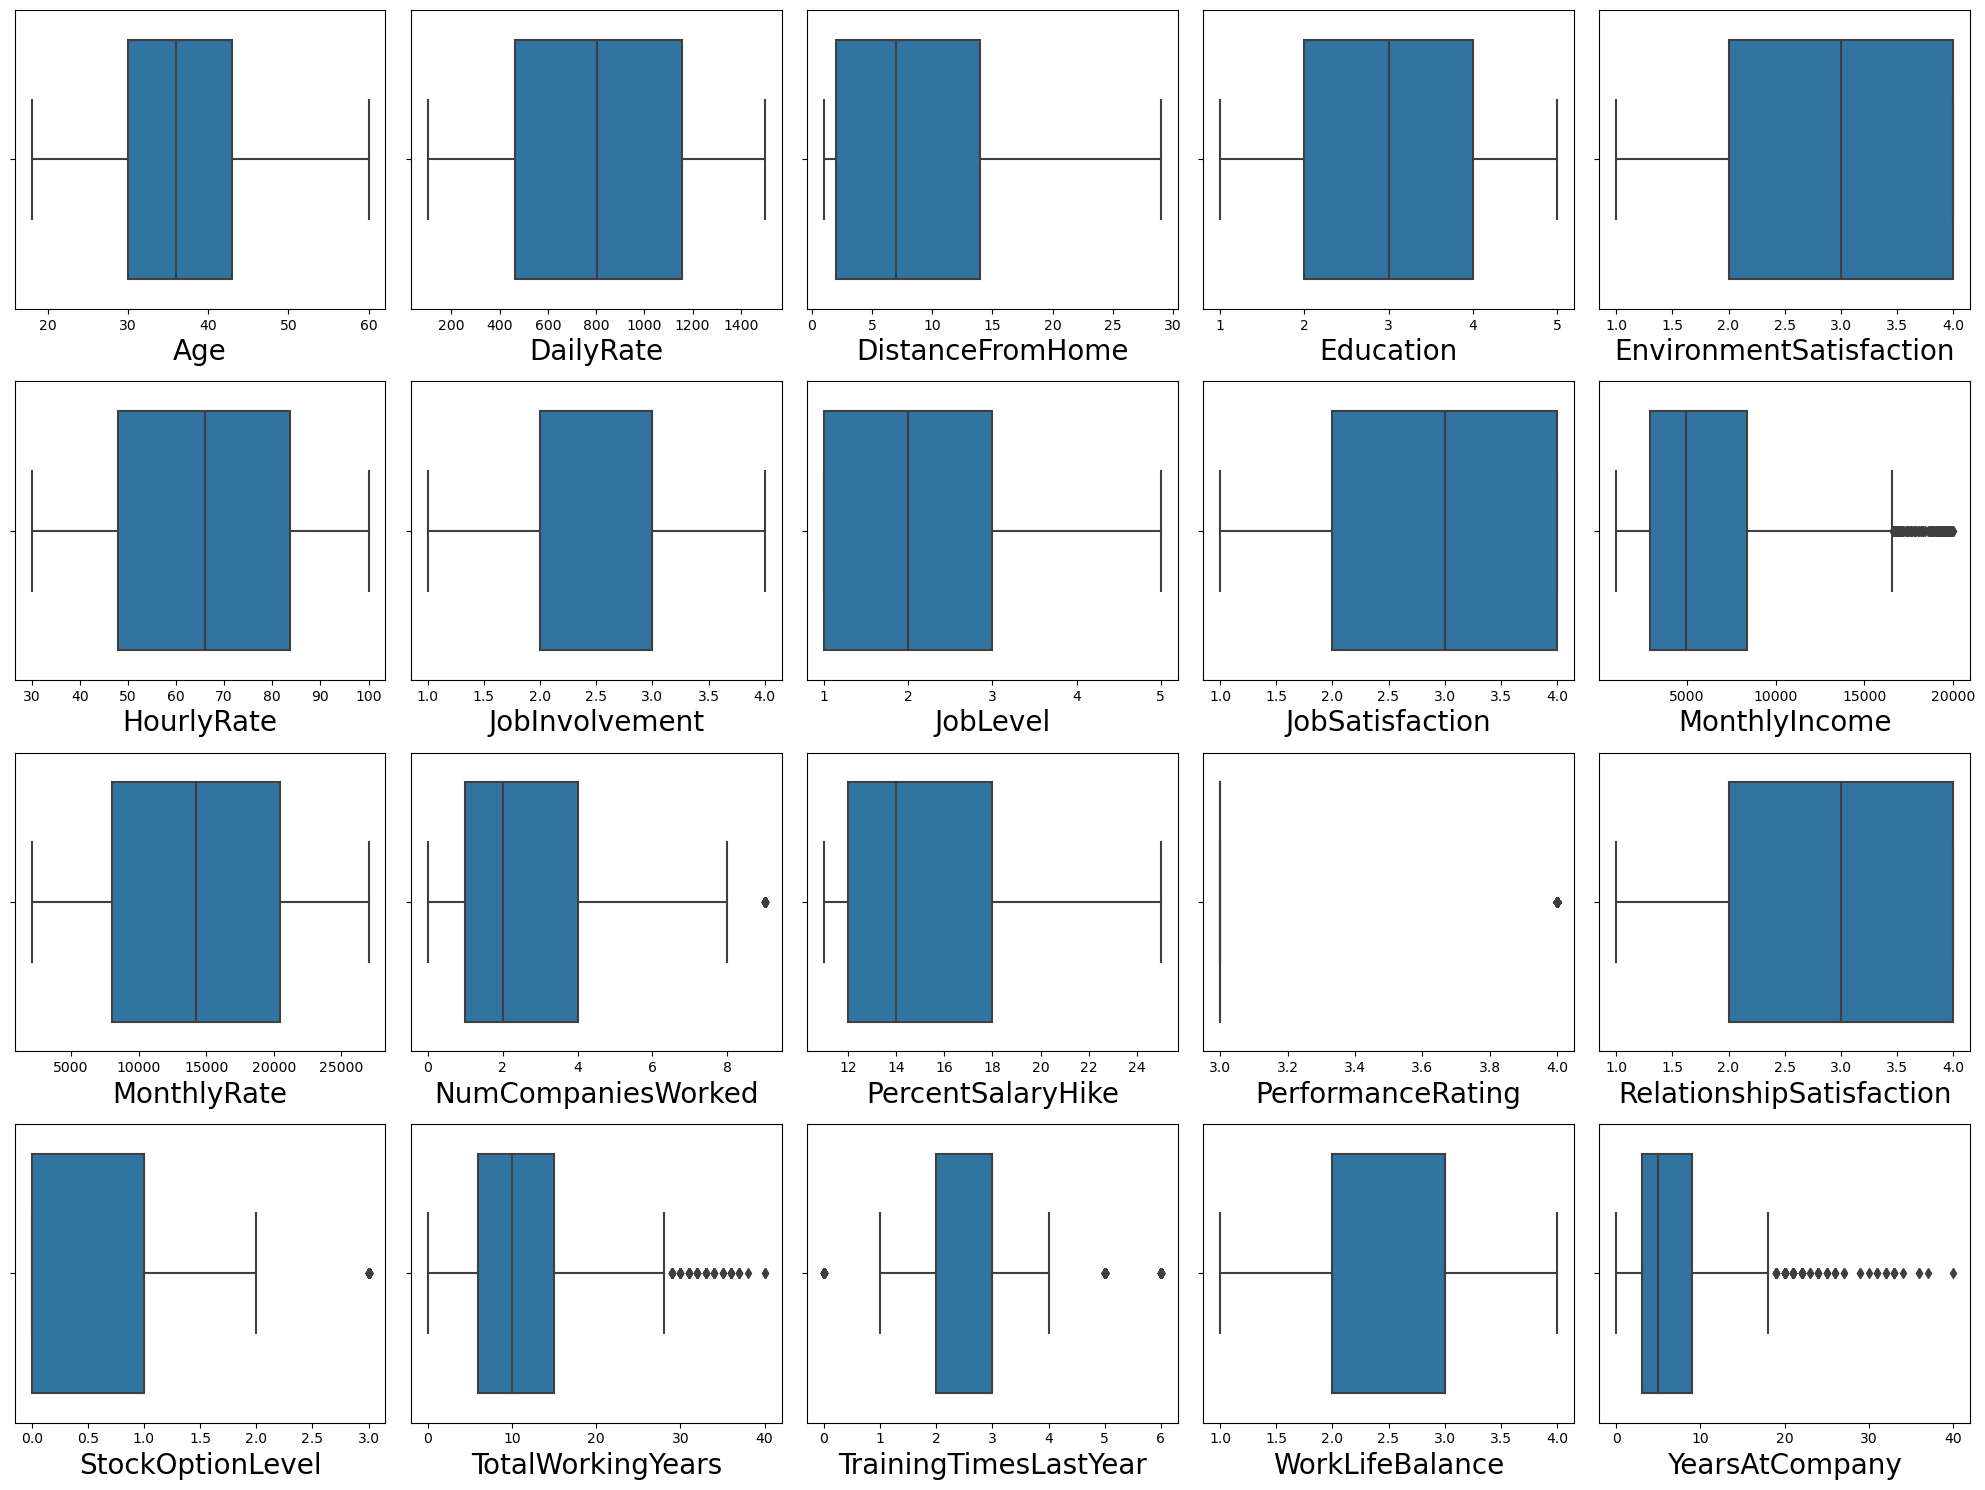

In [33]:
plt.figure(figsize=(20,15))
p=1
for col in df[num_cols]:
    if p<=20:
        plt.subplot(4,5,p)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
    
plt.tight_layout()

* Outliers present in MonthlyIncome, TotalWorkingYears, YearsAtCompany

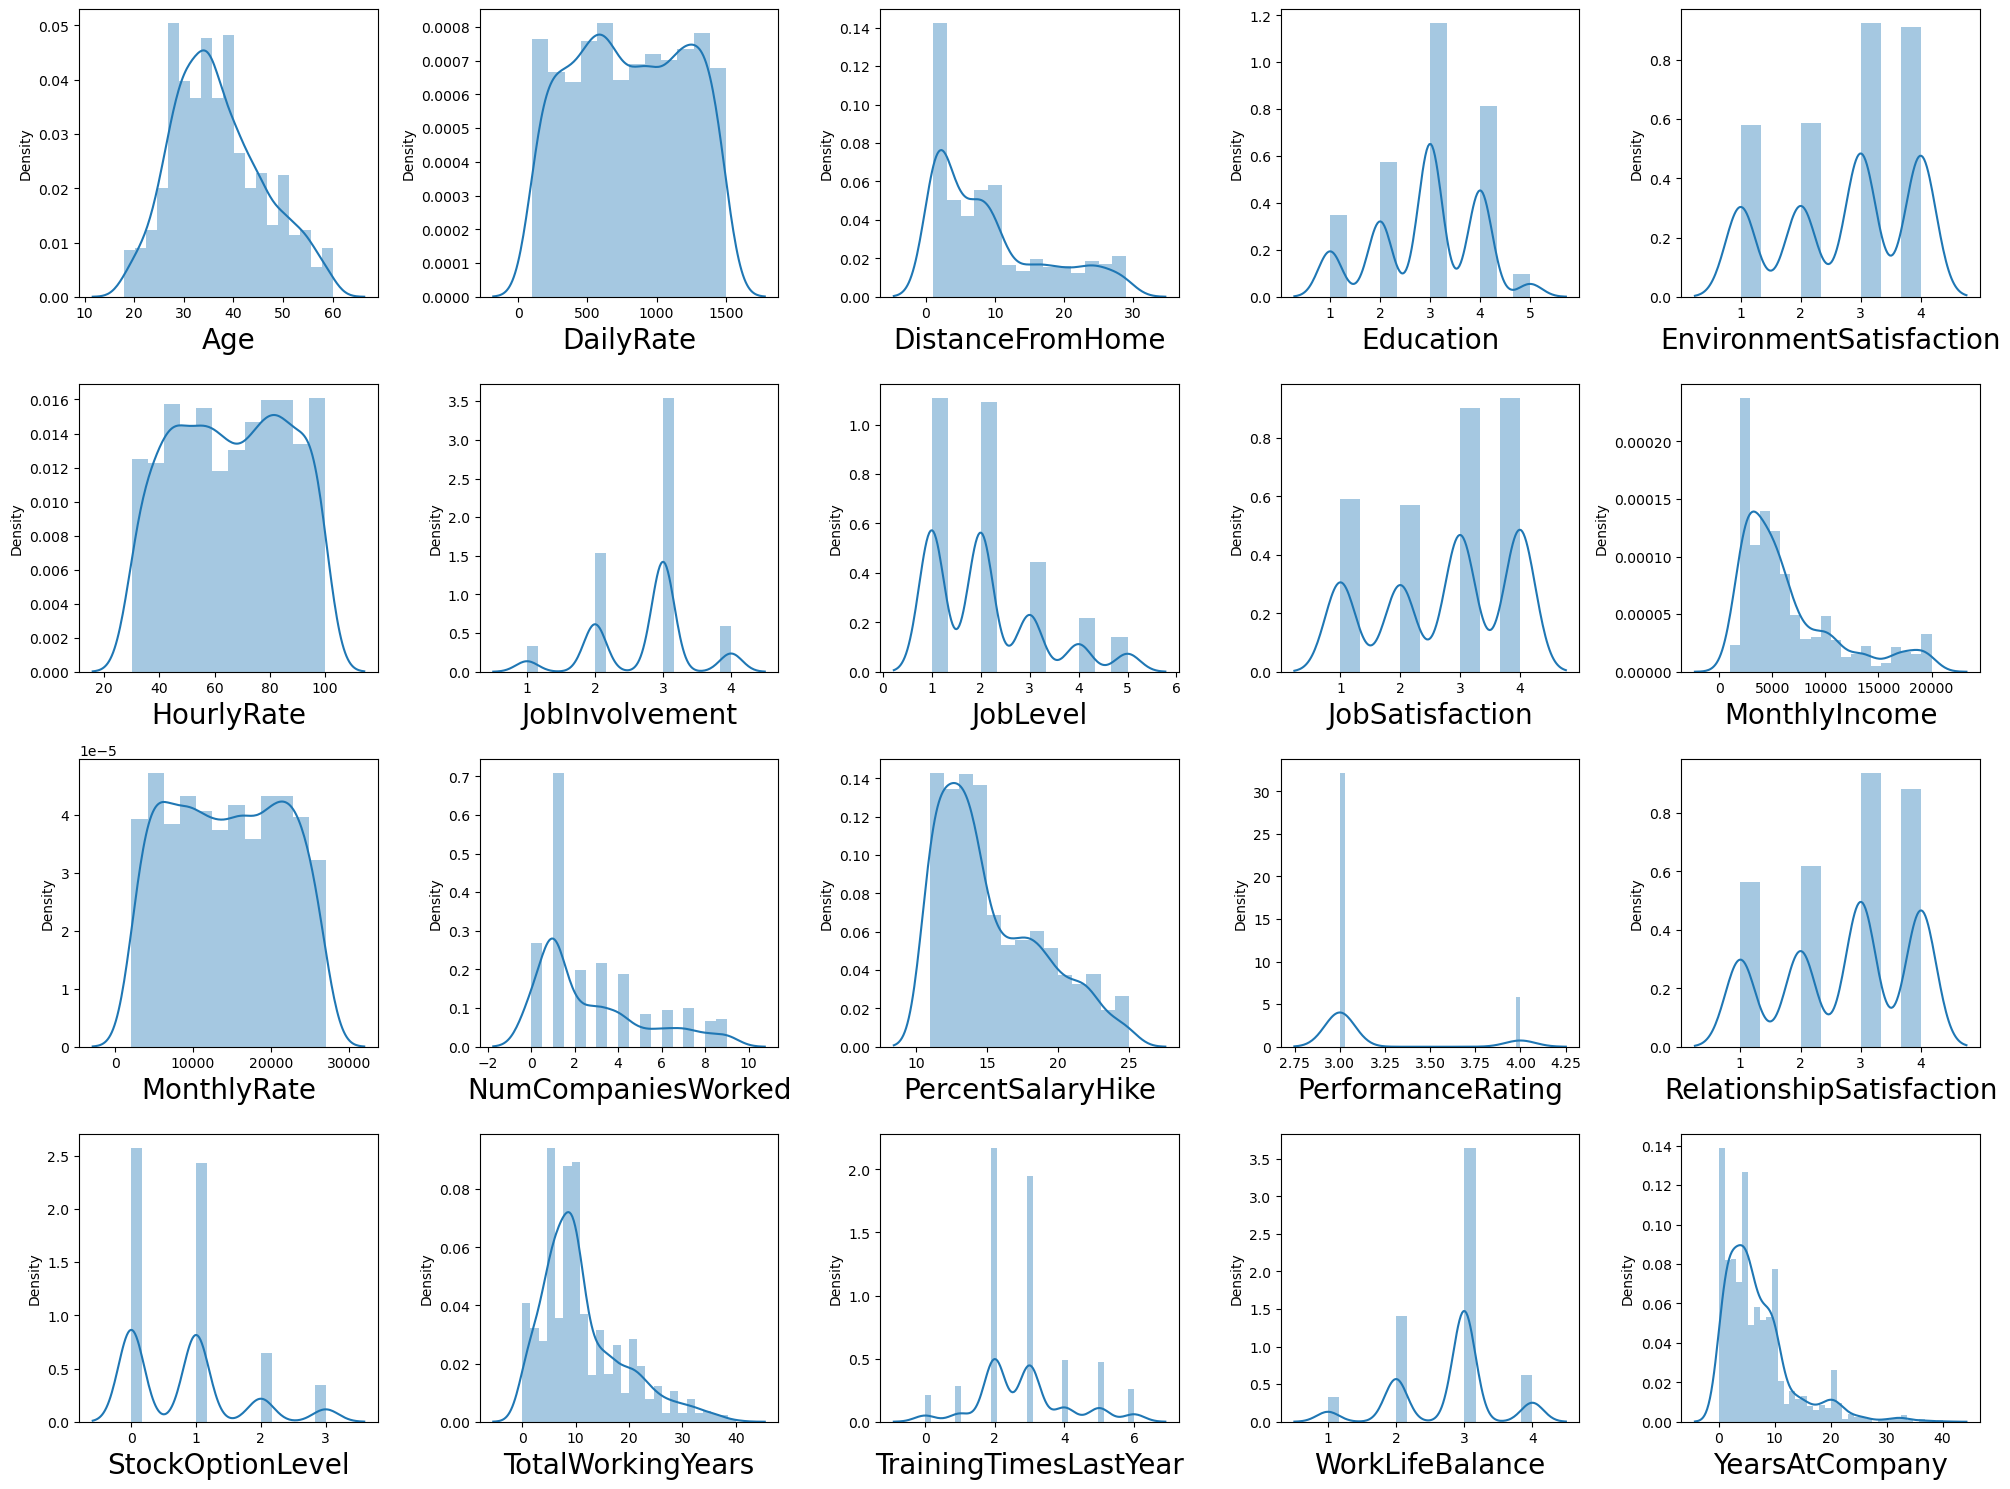

In [34]:
plt.figure(figsize=(20,15))
p=1
for col in df[num_cols]:
    if p<=20:
        plt.subplot(4,5,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
    
plt.tight_layout()

## Encoding Catagorical Columns to Numerical Columns

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [36]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['Gender']=le.fit_transform(df['Gender'])

In [37]:
oe=OrdinalEncoder()
df['BusinessTravel']=oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department']=oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField']=oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['JobRole']=oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus']=oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))

In [38]:
df['BusinessTravel']=df['BusinessTravel'].astype(int)
df['Department']=df['Department'].astype(int)
df['EducationField']=df['EducationField'].astype(int)
df['JobRole']=df['JobRole'].astype(int)
df['MaritalStatus']=df['MaritalStatus'].astype(int)

In [39]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

## Detecting and Removing Outliers using Z-Score Method

In [40]:
from scipy.stats import zscore

In [41]:
z=np.abs(zscore(df))
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             1.010909   0.891688        0.937414                 0.660531   
1             0.147150   1.868426        0.937414                 0.254625   
2             0.887515   0.891688        1.316673                 1.169781   
3             0.764121   1.061787        0.937414                 1.169781   
4             0.887515   1.868426        0.565311                 1.575686   
...                ...        ...             ...                      ...   
1465          1.703764   0.891688        0.565311                 0.254625   
1466          0.393938   1.868426        0.565311                 1.169781   
1467          0.640727   0.085049        0.937414                 0.660531   
1468          0.887515   0.085049        0.565311                 1.169781   
1469          0.147150   0.085049        0.565311                 0.660531   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     1.224745  ...           0.426230                  1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...           0.426230                  0.658973   
3     1.224745  ...           0.426230                  0.266233   
4     0.816497  ...           0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...           0.426230                  0.266233   
1466  0.816497  ...           0.426230                  1.584178   
1467  0.816497  ...           2.346151                  0.658973   
1468  0.816497  ...           0.426230                  1.191438   
1469  0.816497  ...           0.426230                  1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.932014           0.421642               2.171982   
1             0.241988           0.164511               0.155707   
2             0.932014           0.550208               0.155707   
3             0.932014           0.421642               0.155707   
4             0.241988           0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988           0.293077               1.707500   
1467          0.241988           0.678774               2.171982   
1468          0.932014           0.735447               0.155707   
1469          0.932014           0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            2.493820        0.164613            0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096        1.144294            1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096        0.817734            0.615492   
...               ...             ...                 ...   
1465         0.338096        0.327893            0.615492   
1466         0.338096        0.001333            0.764998   
1467         0.338096        0.164613            0.615492   
1468         

In [42]:
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [43]:
df1=df[(z<3).all(axis=1)]
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [44]:
print('Data Loss Percentage after removing outliers using Z-Score method',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers using Z-Score method 5.646258503401361


## Detecting and Removing Outliers using IQR method

In [45]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [46]:
print('Data Loss Percentage after removing outliers using IQR method',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers using IQR method 56.394557823129254


We are choosing Z-Score method because of less data loss.

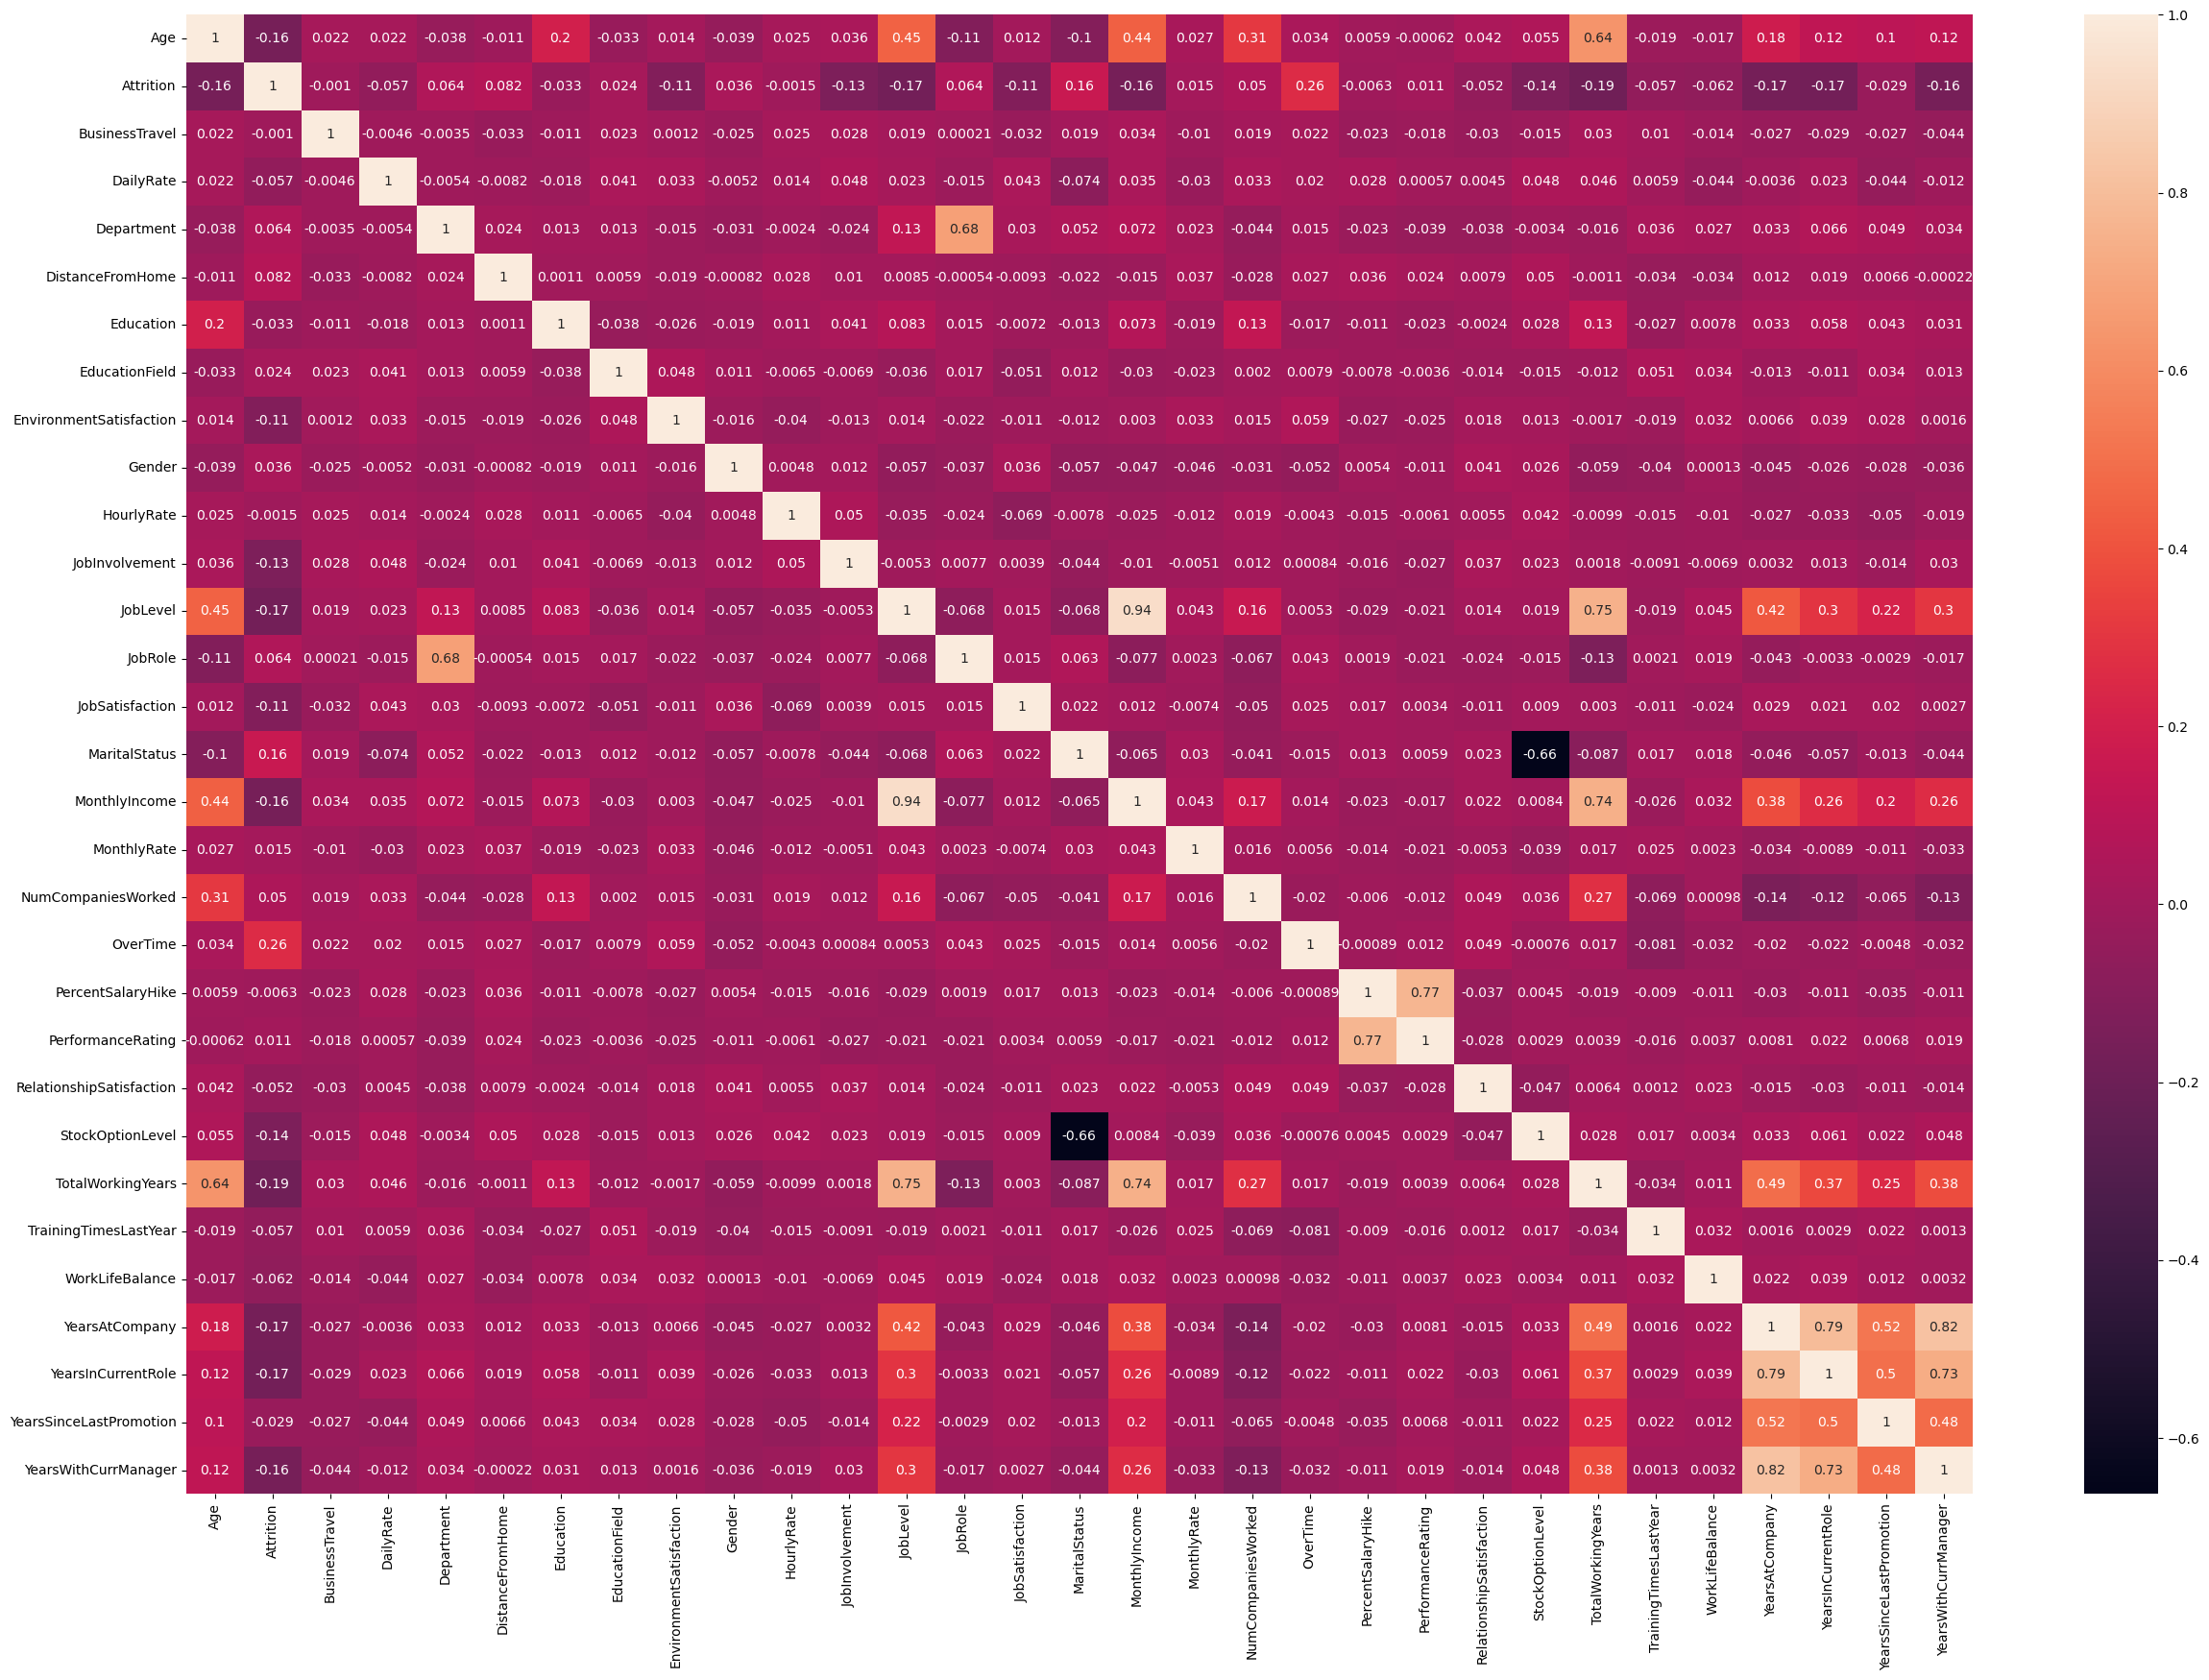

In [47]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## Feature Selection

In [48]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [49]:
x.shape,y.shape

((1387, 30), (1387,))

## Data Preprocessing

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.536681        0.593126   0.734325    1.405373         -1.011249   
1     1.442111       -0.905354  -1.307769   -0.496337         -0.145521   
2     0.083966        0.593126   1.406752   -0.496337         -0.887573   
3    -0.368749       -0.905354   1.453896   -0.496337         -0.763898   
4    -1.047821        0.593126  -0.533609   -0.496337         -0.887573   
...        ...             ...        ...         ...               ...   
1382 -0.029213       -0.905354   0.193406   -0.496337          1.709609   
1383  0.310324        0.593126  -0.479021   -0.496337         -0.392872   
1384 -1.047821        0.593126  -1.615447   -0.496337         -0.640223   
1385  1.442111       -0.905354   0.538304    1.405373         -0.887573   
1386 -0.255570        0.593126  -0.441802   -0.496337         -0.145521   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.876177       -0.940815                -0.665328 -1.229911   
1     -1.853858       -0.940815                 0.251978  0.813067   
2     -0.876177        1.305159                 1.169285  0.813067   
3      1.079185       -0.940815                 1.169285 -1.229911   
4     -1.853858        0.556501                -1.582635  0.813067   
...         ...             ...                      ...       ...   
1382  -0.876177        0.556501                 0.251978  0.813067   
1383  -1.853858        0.556501                 1.169285  0.813067   
1384   0.101504       -0.940815                -0.665328  0.813067   
1385   0.101504        0.556501                 1.169285  0.813067   
1386   0.101504        0.556501                -0.665328  0.813067   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.388670  ...          -0.424765                 -1.575817   
1      -0.239091  ...           2.354241                  1.199034   
2       1.290017  ...          -0.424765                 -0.650866   
3      -0.485721  ...          -0.424765                  0.274084   
4      -1.274939  ...          -0.424765                  1.199034   
...          ...  ...                ...                       ...   
1382   -1.225613  ...          -0.424765                  0.274084   
1383   -1.176286  ...          -0.424765                 -1.575817   
1384    1.043387  ...           2.354241                 -0.650866   
1385   -0.140439  ...          -0.424765                  1.199034   
1386    0.796757  ...          -0.424765                 -1.575817   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.929427          -0.343728              -2.171420   
1             0.238250          -0.045106               0.151871   
2            -0.929427          -0.493039               0.151871   
3            -0.929427          -0.343728               0.151871   
4             0.238250          -0.642351               0.151871   
...                ...                ...                    ...   
1382          0.238250           1.000074               0.151871   
1383          0.238250          -0.194417               1.700732   
1384          0.238250          -0.642351              -2.171420   
1385         -0.929427           1.000074               0.151871   
1386         -0.929427          -0.642351               0.151871   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.501172       -0.022350            0.040903   
1            0.336558        0.832812            0.965895   
2            0.336558       -1.305094           -1.192419   
3            0.336558        0.405231            0.965895   
4            0.336558       -0.877513           -0.575758   
...               ...             ...                 ...   
1382         0.336558       -0.236141           -0.575758   
1383         0.336558        0.191440            0.965895   
1384         0.336558       -0.022350           -0.575758   
1

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0                        Age    1.850568
1             BusinessTravel    1.014106
2                  DailyRate    1.029494
3                 Department    2.062034
4           DistanceFromHome    1.019457
5                  Education    1.061558
6             EducationField    1.021559
7    EnvironmentSatisfaction    1.021370
8                     Gender    1.023993
9                 HourlyRate    1.022001
10            JobInvolvement    1.018417
11                  JobLevel   10.188826
12                   JobRole    1.978117
13           JobSatisfaction    1.022468
14             MaritalStatus    1.838550
15             MonthlyIncome    9.376741
16               MonthlyRate    1.017026
17        NumCompaniesWorked    1.259499
18                  OverTime    1.028209
19         PercentSalaryHike    2.479609
20         PerformanceRating    2.473394
21  RelationshipSatisfaction    1.020205
22          StockOptionLevel    1.821502
23         TotalWorkingYears    3.887996
24     TrainingTimesLastYear    1.026639
25           WorkLifeBalance    1.018066
26            YearsAtCompany    4.883652
27        YearsInCurrentRole    2.984247
28   YearsSinceLastPromotion    1.436720
29      YearsWithCurrManager    3.323766

In [54]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm=SMOTE()
X,Y=sm.fit_resample(x,y)
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

## Finding Best Random State for building our classification models

In [58]:
maxAcc=0
maxRs=0

for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print('Best Score ',maxAcc)
print('Best Random State ',rs)

Best Score  0.814388489208633
Best Random State  36


In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=36)

In [81]:
print('Size of x_train:',x_train.shape)
print('Size of x_test:',x_test.shape)
print('Size of y_train:',y_train.shape)
print('Size of y_test:',y_test.shape)

Size of x_train: (1621, 30)
Size of x_test: (695, 30)
Size of y_train: (1621,)
Size of y_test: (695,)


## Machine learning Models for Classification with Evaluation Metrics

In [82]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=36)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=accuracy_score(y_test,pred)*100
    print('Accuracy Score ',acc_score)
    con_matrix=confusion_matrix(y_test,pred)
    print('Confusion Matrix ',con_matrix)
    class_report=classification_report(y_test,pred)
    print('Classification Matrix ',class_report)
    cv_score=(cross_val_score(clf,X,Y,cv=5).mean()*100)
    print('Cross Validation Score:',cv_score)
    result = acc_score-cv_score
    print("Accuracy_Score-Cross Validation Score is",result)

## Logistic Regression

In [83]:
clf=LogisticRegression()
classify(clf,X,Y)

Accuracy Score  81.43884892086331
Confusion Matrix  [[294  63]
 [ 66 272]]
Classification Matrix                precision    recall  f1-score   support

           0       0.82      0.82      0.82       357
           1       0.81      0.80      0.81       338

    accuracy                           0.81       695
   macro avg       0.81      0.81      0.81       695
weighted avg       0.81      0.81      0.81       695

Cross Validation Score: 78.62674089521116
Accuracy_Score-Cross Validation Score is 2.812108025652151


## Decision Tree Classifier

In [84]:
clf=DecisionTreeClassifier()
classify(clf,X,Y)

Accuracy Score  82.73381294964028
Confusion Matrix  [[289  68]
 [ 52 286]]
Classification Matrix                precision    recall  f1-score   support

           0       0.85      0.81      0.83       357
           1       0.81      0.85      0.83       338

    accuracy                           0.83       695
   macro avg       0.83      0.83      0.83       695
weighted avg       0.83      0.83      0.83       695

Cross Validation Score: 85.45496015491175
Accuracy_Score-Cross Validation Score is -2.721147205271464


## Random Forest Classifier

In [85]:
clf=RandomForestClassifier()
classify(clf,X,Y)

Accuracy Score  94.3884892086331
Confusion Matrix  [[345  12]
 [ 27 311]]
Classification Matrix                precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.96      0.92      0.94       338

    accuracy                           0.94       695
   macro avg       0.95      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695

Cross Validation Score: 93.44408654204216
Accuracy_Score-Cross Validation Score is 0.9444026665909462


## Gradient Boosting Classifier

In [86]:
clf=GradientBoostingClassifier()
classify(clf,X,Y)

Accuracy Score  93.38129496402877
Confusion Matrix  [[343  14]
 [ 32 306]]
Classification Matrix                precision    recall  f1-score   support

           0       0.91      0.96      0.94       357
           1       0.96      0.91      0.93       338

    accuracy                           0.93       695
   macro avg       0.94      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695

Cross Validation Score: 88.01053846726745
Accuracy_Score-Cross Validation Score is 5.370756496761317


## Ada Boost Classifier

In [87]:
clf=AdaBoostClassifier()
classify(clf,X,Y)

Accuracy Score  91.36690647482014
Confusion Matrix  [[327  30]
 [ 30 308]]
Classification Matrix                precision    recall  f1-score   support

           0       0.92      0.92      0.92       357
           1       0.91      0.91      0.91       338

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695

Cross Validation Score: 87.4021561033738
Accuracy_Score-Cross Validation Score is 3.9647503714463426


## SVC

In [88]:
clf=SVC()
classify(clf,X,Y)

Accuracy Score  93.09352517985612
Confusion Matrix  [[323  34]
 [ 14 324]]
Classification Matrix                precision    recall  f1-score   support

           0       0.96      0.90      0.93       357
           1       0.91      0.96      0.93       338

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695

Cross Validation Score: 92.14288374171446
Accuracy_Score-Cross Validation Score is 0.950641438141659


## KNeighbors Classifier

In [89]:
clf=KNeighborsClassifier()
classify(clf,X,Y)

Accuracy Score  81.58273381294964
Confusion Matrix  [[232 125]
 [  3 335]]
Classification Matrix                precision    recall  f1-score   support

           0       0.99      0.65      0.78       357
           1       0.73      0.99      0.84       338

    accuracy                           0.82       695
   macro avg       0.86      0.82      0.81       695
weighted avg       0.86      0.82      0.81       695

Cross Validation Score: 81.43451627318092
Accuracy_Score-Cross Validation Score is 0.14821753976872287


## XG Boost Classifier

In [90]:
clf=xg.XGBClassifier()
classify(clf,X,Y)

Accuracy Score  93.9568345323741
Confusion Matrix  [[341  16]
 [ 26 312]]
Classification Matrix                precision    recall  f1-score   support

           0       0.93      0.96      0.94       357
           1       0.95      0.92      0.94       338

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695

Cross Validation Score: 89.99497281596781
Accuracy_Score-Cross Validation Score is 3.9618617164062897


* From the above evaluation metrics,We are choosing Random Forest Classifier as final model because of its F1 Score and has less differnce between Accuracy Score and CV score.

In [91]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred)*100)
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:',classification_report(y_test,pred))

Accuracy Score: 94.53237410071942
Confusion Matrix: [[347  10]
 [ 28 310]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.97      0.92      0.94       338

    accuracy                           0.95       695
   macro avg       0.95      0.94      0.95       695
weighted avg       0.95      0.95      0.95       695



## Hyperparameter Tuning for finding Best Parameters

In [92]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6],
    'criterion':['gini','entropy']
}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]})

In [93]:
print('Best Score:',grid_search.best_score_*100)
print('Best estimator:',grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)

Best Score: 88.58755385060358
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.5,
                       n_estimators=200)
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 200}


In [94]:
rf_final=RandomForestClassifier(criterion='entropy',max_depth=6,bootstrap=True,max_features=0.5,n_estimators=200)
rf_final.fit(x_train,y_train)
pred_rf=rf_final.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred_rf)*100)
print('Confusion Matrix:',confusion_matrix(y_test,pred_rf))
print('Classification Report:',classification_report(y_test,pred_rf))

Accuracy Score: 90.50359712230215
Confusion Matrix: [[325  32]
 [ 34 304]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       357
           1       0.90      0.90      0.90       338

    accuracy                           0.91       695
   macro avg       0.91      0.90      0.90       695
weighted avg       0.91      0.91      0.91       695



## AUC ROC Curve

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

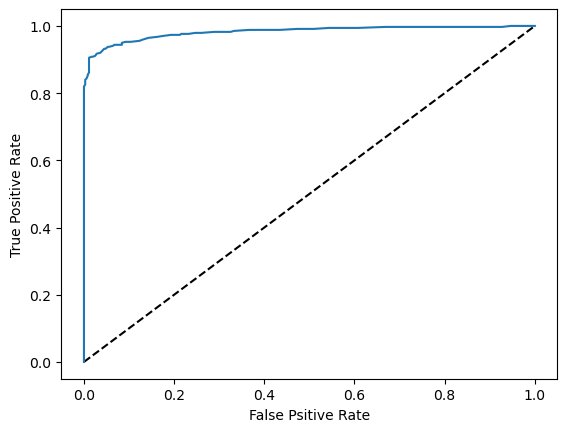

Score: 94.45742794159085


In [96]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Psitive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score*100)

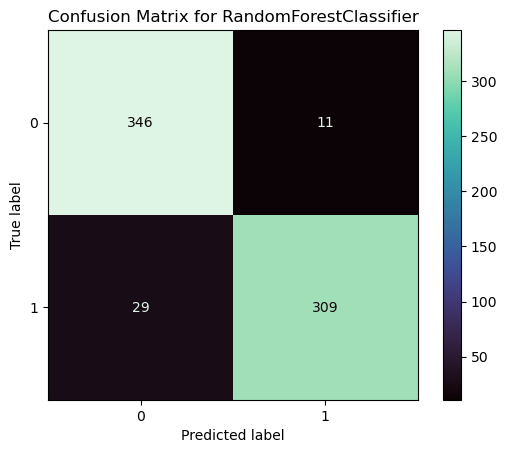

In [97]:
class_names=df1.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train),x_test,y_test,cmap='mako')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Saving The Model

In [98]:
import pickle

In [99]:
filename='HR Employee Attrition Analysis.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open('HR Employee Attrition Analysis.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

94.24460431654677


In [100]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  685  686  \
Predicted    1    0    0    0    1    0    1    0    1    0  ...    1    0   
Original     1    0    0    0    1    0    1    0    1    0  ...    1    0   

           687  688  689  690  691  692  693  694  
Predicted    1    1    0    1    0    1    1    0  
Original     1    1    0    1    0    1    1    0  

[2 rows x 695 columns]

## Conclusion

*  Overall Attrition Rate is 16.2%.
*  Male has the higher Attrition than Female.
*  Employees who travels rarely has the highest Attrition.
*  Employees who works in Research & Development has highest Attrition.
*  Employees who are single has the highest Attrition.
*  Monthly Income is positively Correlated with Total Working Years.
*  Age is Positively Correlated with Total Working Years.
*  Marital Status is Negatively Correlated with Stock Option Level.
*  Built Several Machine Learning Models for Attrition Analysis. In that I have chosen Random Forest Classifier model because of it highest F1 score and less difference between accuracy score and cross validation score.
*  Accuracy of Random Forest Classifier is 94.2%.